<a href="https://colab.research.google.com/github/VladMarianciuc/Mathematical-Modelling/blob/main/MMSM_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

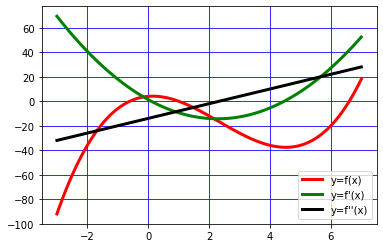

In [ ]:
# Prima si a doua derivata a unei functii

import numpy as np
import matplotlib.pyplot as plt

f = lambda x: x**3-7*x**2+2*x+4

x = np.linspace(-3, 7, 100)
h = x[1]-x[0]

fig = plt.figure()
ax = plt.axes()
ax.grid(True, color='b')

ax.plot(x, f(x), lw='3', color='r', label='y=f(x)')

def DifFinProg(x, f, h):
    n = len(x)
    df = np.zeros(n)
    for i in range(n):
        df[i]=(f(x[i]+h)-f(x[i]))/h
    return df

def Dif2FinProg(x, f, h):
    n = len(x)
    df2 = np.zeros(n)
    for i in range(n):
        df2[i] = (f(x[i]+h)-2*f(x[i])+f(x[i]-h))/(h**2)
    return df2

df = DifFinProg(x, f, h)
ax.plot(x, df, lw='3', color='g', label="y=f'(x)")

df2 = Dif2FinProg(x, f, h)
ax.plot(x, df2, lw='3', color='black', label="y=f''(x)")
ax.legend(loc='best')
        


In [ ]:
# Integrala unei functii

def Integrare_T(f, a, b, m): # folosind metoda trapezului
    x = np.linspace(a, b, m+1)
    suma = 0
    h = x[1]-x[0]
    for i in range(1, m):
        suma += f(x[i])
    suma *= 2
    suma += f(x[0])+f(x[m])
    suma *= h/2
    
    return suma

I_aprox = Integrare_T(f, -3, 7, 1000)
print(I_aprox)

import scipy as sc
from scipy import integrate

I_aprox2, err = integrate.quad(f, -3, 7)
print(I_aprox2, err)

I_aprox3 = integrate.trapz(f(x), x)
print(I_aprox3)

I_aprox4 = integrate.simps(f(x), x)
print(I_aprox4)

-203.33349999999547
-203.33333333333337 2.435918049105697e-12
-203.3503384008434
-203.33350510169205


[  1.           1.0586303    1.11247557   1.16045123   1.20143205
   1.23425676   1.25773287   1.27064186   1.27174454   1.25978663
   1.23350456   1.1916315    1.13290345   1.05606553   0.95987838
   0.84312464   0.70461549   0.54319718   0.35775769   0.14723323
  -0.08938521  -0.35304544  -0.64462767  -0.96493834  -1.31470404
  -1.69456561  -2.10507249  -2.54667725  -3.01973045  -3.5244757
  -4.06104511  -4.62945504  -5.22960219  -5.86126011  -6.52407606
  -7.21756836  -7.94112409  -8.69399734  -9.47530784 -10.28404013
 -11.11904325 -11.97903086 -12.86258193 -13.76814198 -14.6940248
 -15.63841473 -16.59936947 -17.57482346 -18.56259174 -19.56037443
 -20.56576161 -21.57623888 -22.58919328 -23.60191985 -24.61162854
 -25.61545173 -26.6104521  -27.59363098 -28.56193714 -29.51227593
 -30.44151883 -31.3465133  -32.22409302 -33.07108834 -33.88433704
 -34.66069533 -35.39704895 -36.09032462 -36.73750136 -37.33562217
 -37.88180554 -38.37325712 -38.8072813  -39.18129275 -39.49282784
 -39.7395559

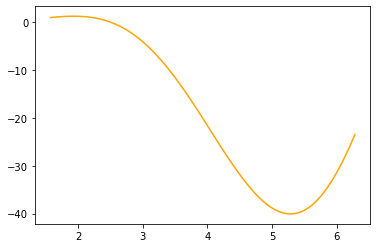

In [ ]:
# Rezolvare ecuatii diferentiale

def pct_central(f, t_init, t_f, x_init, N):
    t = np.linspace(t_init, t_f, N)
    x = np.zeros(N)
    x[0] = x_init
    h=t[1]-t[0]
    for i in range(N-1):
        K1 = h*f(t[i], x[i])
        K2 = h*f(t[i]+h/2, x[i]+K1/2)
        x[i+1] = x[i]+K2
    return t, x

t_init = np.pi/2
t_f = 2*np.pi
x_init = 1
f = lambda t, x: 2/t*x+t**2*np.cos(t)
N=100
t_sol, x_sol=pct_central(f, t_init, t_f, x_init, N)
print(x_sol)

fig2 = plt.figure(2)
ax2 = plt.axes()
ax2.plot(t_sol, x_sol, color='orange', label='y=x(t)' )
ax.legend(loc = 'best')
